In [22]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib.axes as ax

In [24]:
data = pd.read_csv('data_for_lr.csv')

In [26]:
data.head(10)

,x,y
0,24.0,21.549452
1,50.0,47.464463
2,15.0,17.218656
3,38.0,36.586398
4,87.0,87.288984
5,36.0,32.463875
6,12.0,10.780897
7,81.0,80.763399
8,25.0,24.612151
9,5.0,6.963319


In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       700 non-null    float64
 1   y       699 non-null    float64
dtypes: float64(2)
memory usage: 11.1 KB


## Data Processing

In [30]:
data.isnull().sum()

x    0
y    1
dtype: int64

In [21]:
data.shape

(700, 2)

In [32]:
data = data.dropna()
data.shape

(699, 2)

## Splitting data

In [71]:
np.array(data.x[0:500]).reshape(500,1)

array([[ 24.],
       [ 50.],
       [ 15.],
       [ 38.],
       [ 87.],
       [ 36.],
       [ 12.],
       [ 81.],
       [ 25.],
       [  5.],
       [ 16.],
       [ 16.],
       [ 24.],
       [ 39.],
       [ 54.],
       [ 60.],
       [ 26.],
       [ 73.],
       [ 29.],
       [ 31.],
       [ 68.],
       [ 87.],
       [ 58.],
       [ 54.],
       [ 84.],
       [ 58.],
       [ 49.],
       [ 20.],
       [ 90.],
       [ 48.],
       [  4.],
       [ 25.],
       [ 42.],
       [  0.],
       [ 60.],
       [ 93.],
       [ 39.],
       [  7.],
       [ 21.],
       [ 68.],
       [ 84.],
       [  0.],
       [ 58.],
       [ 19.],
       [ 36.],
       [ 19.],
       [ 59.],
       [ 51.],
       [ 19.],
       [ 33.],
       [ 85.],
       [ 44.],
       [  5.],
       [ 59.],
       [ 14.],
       [  9.],
       [ 75.],
       [ 69.],
       [ 10.],
       [ 17.],
       [ 58.],
       [ 74.],
       [ 21.],
       [ 51.],
       [ 19.],
       [ 50.],
       [ 2

In [36]:
# training input and output 
train_input = np.array(data.x[0:500]).reshape(500,1)
train_output = np.array(data.y[0:500]).reshape(500,1)

# testing input and output 
test_input = np.array(data.x[500:699]).reshape(199,1)
test_output = np.array(data.y[500:699]).reshape(199,1)

In [38]:
print(train_input.shape),
print(train_output.shape),
print(test_input.shape),
print(test_output.shape)

(500, 1)
(500, 1)
(199, 1)
(199, 1)


## Linear Regression

## Forward propagation

In [40]:
def forward_propagation(train_input,parameters):
     m = parameters['m']
     c = parameters['c']
     pred = np.multiply(m,train_input) + c
     return pred
    

## Cost Function

summation(1/2n * (y-f(x))^2)


In [42]:
def cost_function(predictions, train_output):
    cost = np.mean((train_output - predictions) ** 2) * 0.5
    return cost

## Gradient Descent for Backpropagation

In [44]:
def backward_propagation(train_input, train_output, predictions):
    derivatives = dict()
    df = (train_output - predictions) * -1
    dm = np.mean(np.multiply(train_input, df))
    dc = np.mean(df)
    derivatives['dm'] = dm
    derivatives['dc'] = dc
    return derivatives

## Update Parameters

m = m - (learning rate * dm)

c = c - (learning rate * dc)

In [46]:
def update_parameters(parameters, derivatives, learning_rate):
    parameters['m'] = parameters['m'] - learning_rate * derivatives['dm']
    parameters['c'] = parameters['c'] - learning_rate * derivatives['dc']
    return parameters

## Model TRaining

In [48]:
def train(train_input, train_output, learning_rate, iters):
    
    #random parameters
    parameters = dict()
    parameters["m"] = np.random.uniform(0,1) * -1
    parameters["c"] = np.random.uniform(0,1) * -1
    
    plt.figure()
    
    #loss
    loss = list()
    
    #iterate
    for i in range(iters):
        
        #forward propagation
        predictions = forward_propagation(train_input, parameters)
        
        #cost function
        cost = cost_function(predictions, train_output)
        
        #append loss and print
        loss.append(cost)
        print("Iteration = {}, Loss = {}".format(i+1, cost))
        
        #plot function
        fig, ax = plt.subplots()
        
        ax.plot(train_input, train_output, '+', label='Original')
        ax.plot(train_input, predictions, '*', label='Training')

        legend = ax.legend()
        
        plt.plot(train_input, train_output, '+')
        plt.plot(train_input, predictions, '*')        
        
        plt.show()
        
        #back propagation
        derivatives = backward_propagation(train_input, train_output, predictions)
        
        #update parameters
        parameters = update_parameters(parameters, derivatives, learning_rate)
        
    return parameters, loss

## Training

Iteration = 1, Loss = 6264.063194315539


<Figure size 640x480 with 0 Axes>

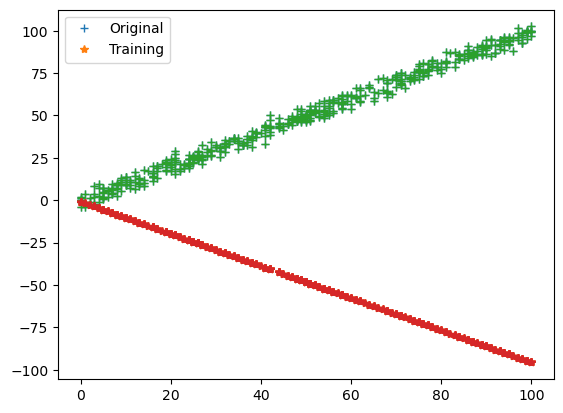

Iteration = 2, Loss = 2844.171415366138


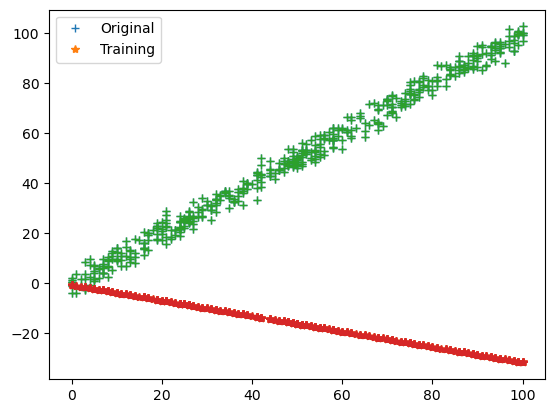

Iteration = 3, Loss = 1292.562726096195


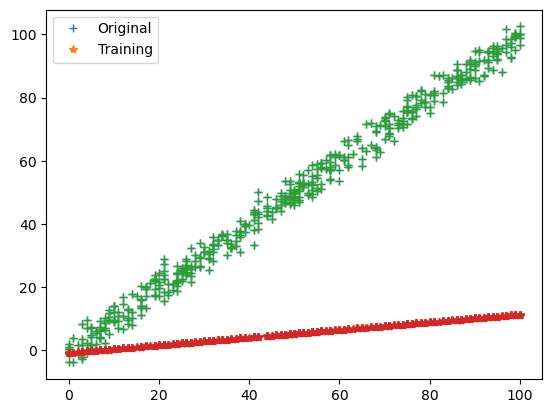

Iteration = 4, Loss = 588.5961440012298


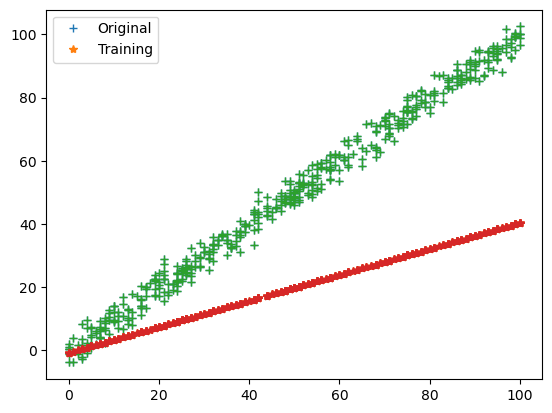

Iteration = 5, Loss = 269.2057248149424


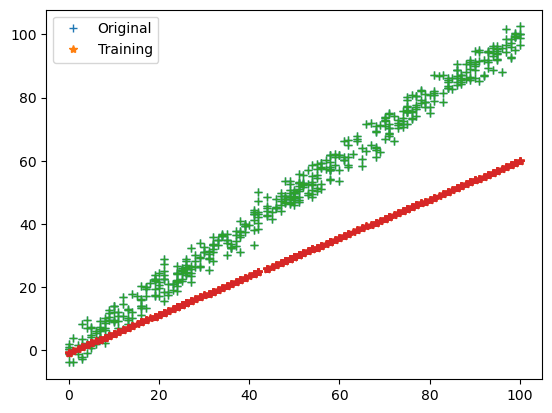

Iteration = 6, Loss = 124.2979367127879


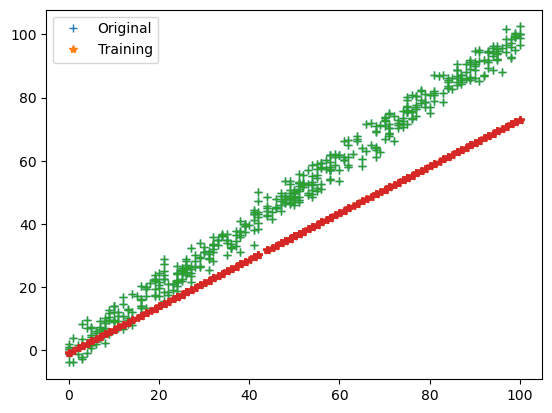

Iteration = 7, Loss = 58.55311159771563


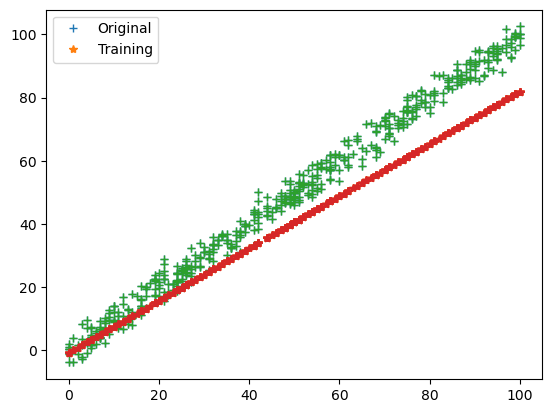

Iteration = 8, Loss = 28.72461047410089


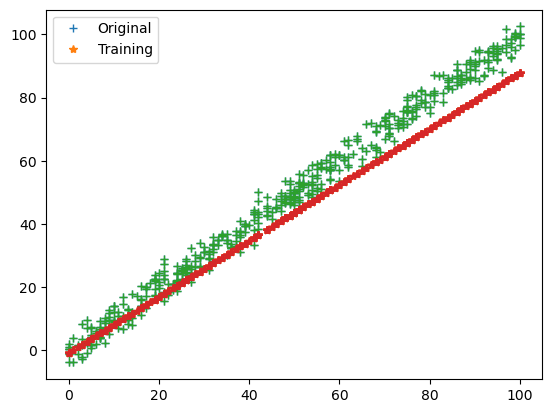

Iteration = 9, Loss = 15.191385327868865


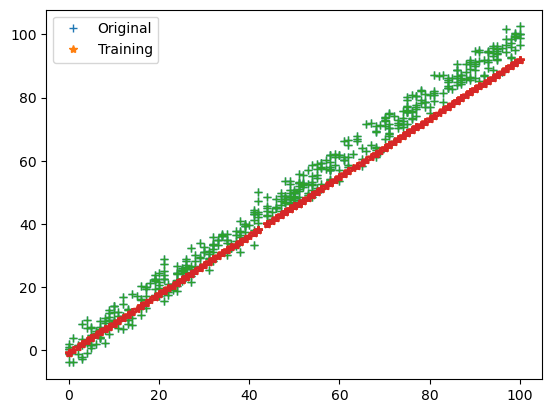

Iteration = 10, Loss = 9.051344941952488


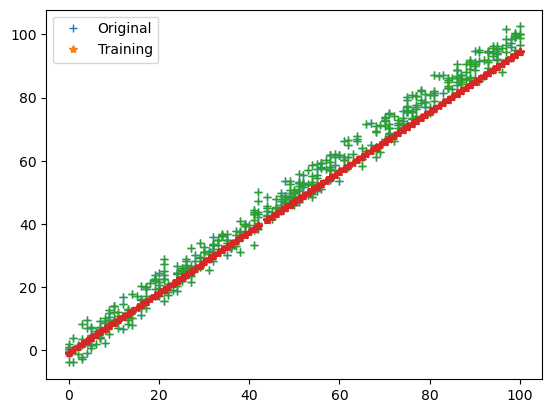

Iteration = 11, Loss = 6.265600670845195


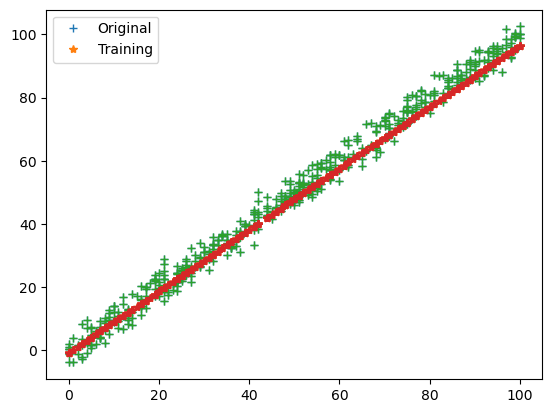

Iteration = 12, Loss = 5.001704262441224


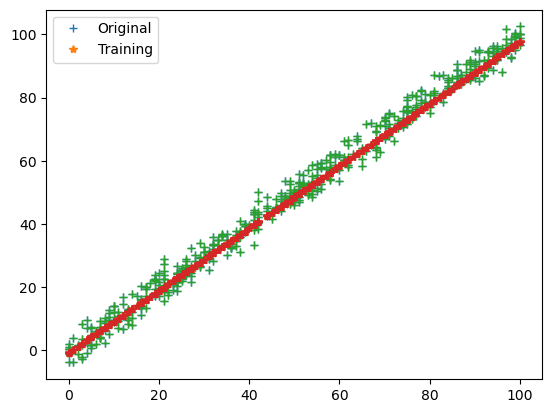

Iteration = 13, Loss = 4.428271915064912


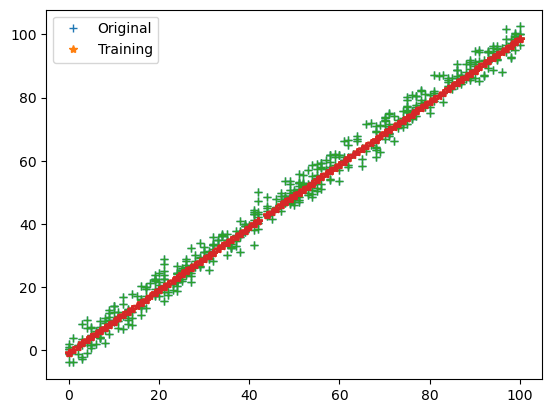

Iteration = 14, Loss = 4.168103877021094


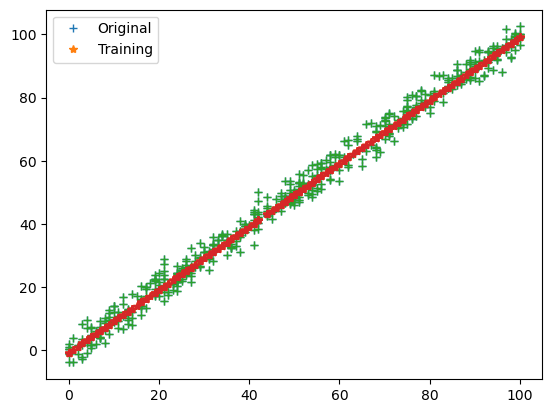

Iteration = 15, Loss = 4.050064203163656


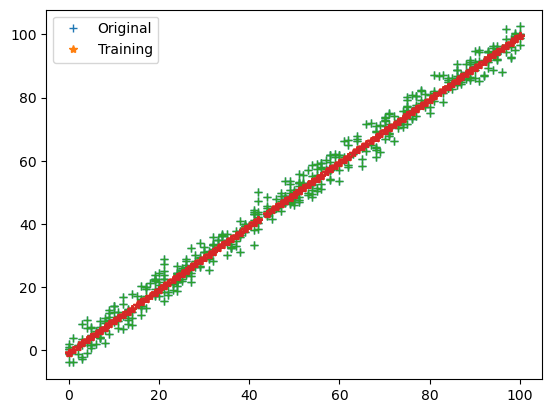

Iteration = 16, Loss = 3.9965083256225817


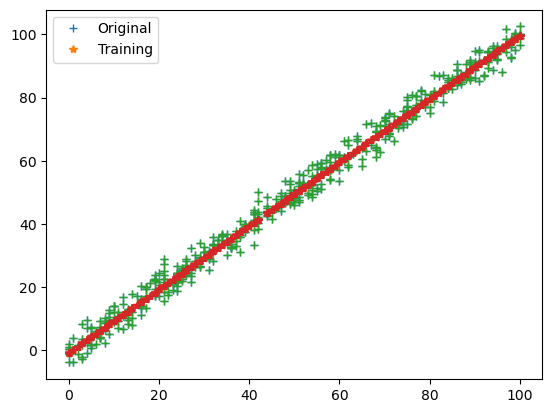

Iteration = 17, Loss = 3.9722088179529225


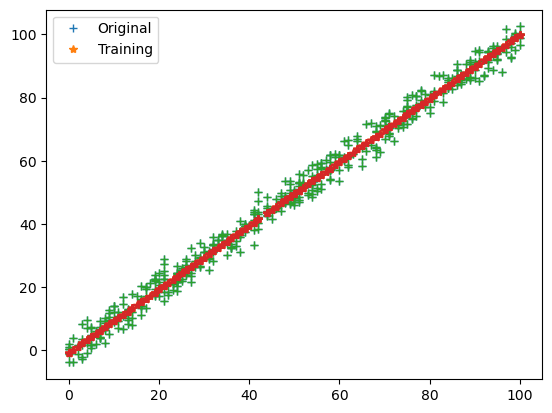

Iteration = 18, Loss = 3.961182957757243


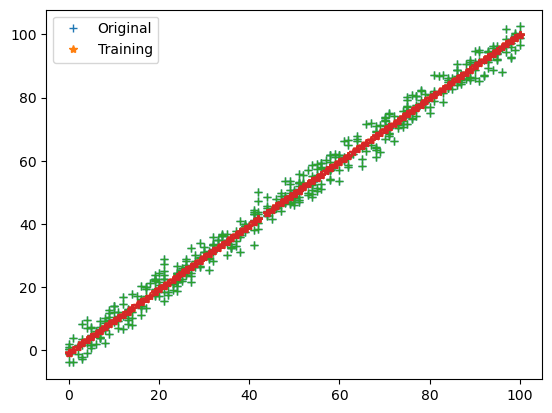

Iteration = 19, Loss = 3.9561793661807103


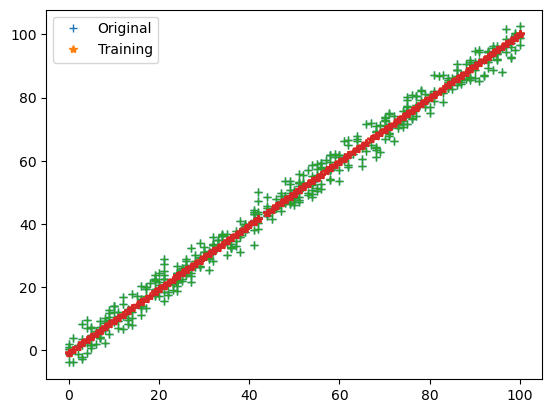

Iteration = 20, Loss = 3.953908084604955


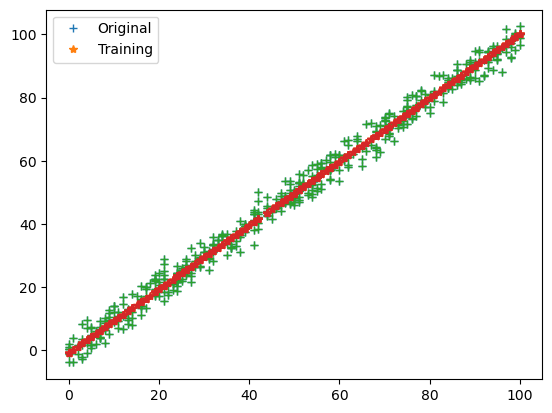

In [50]:
parameters, loss = train(train_input, train_output, 0.0001, 20)

Iteration = 1, Loss = 4152.525208049985


<Figure size 640x480 with 0 Axes>

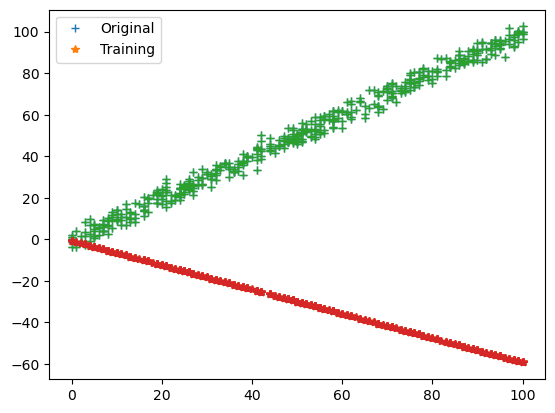

Iteration = 2, Loss = 439345759.89085346


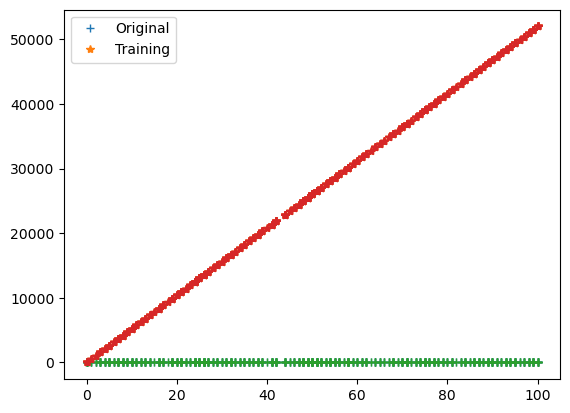

Iteration = 3, Loss = 46527805337318.516


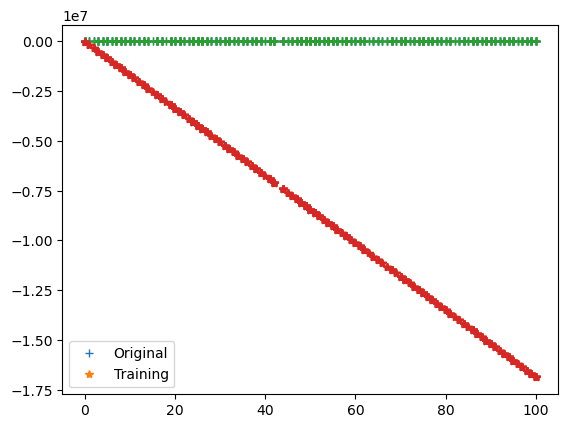

Iteration = 4, Loss = 4.927409995805282e+18


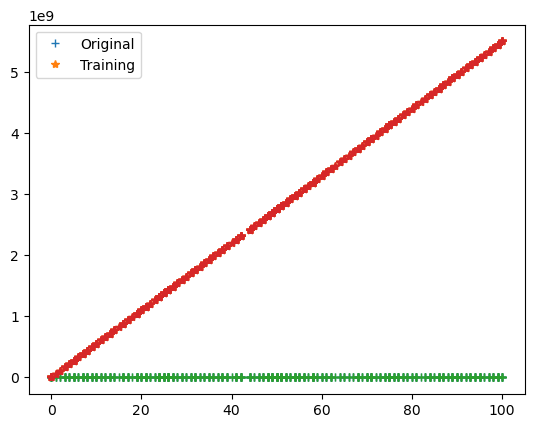

Iteration = 5, Loss = 5.2182494082286194e+23


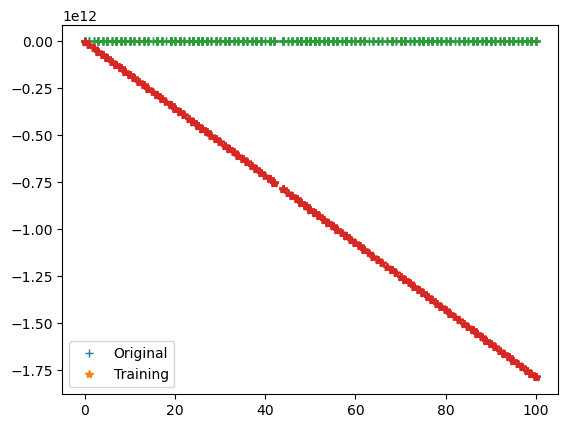

Iteration = 6, Loss = 5.526255560154203e+28


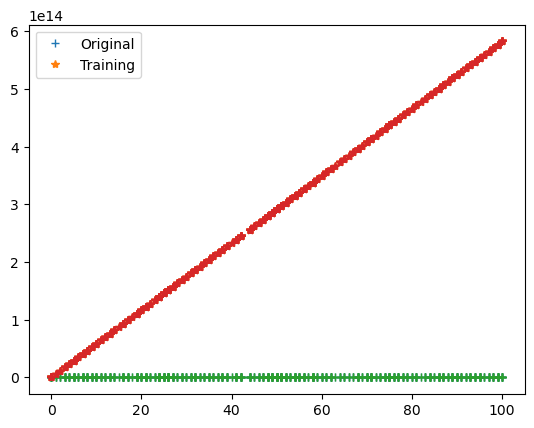

Iteration = 7, Loss = 5.852441715027595e+33


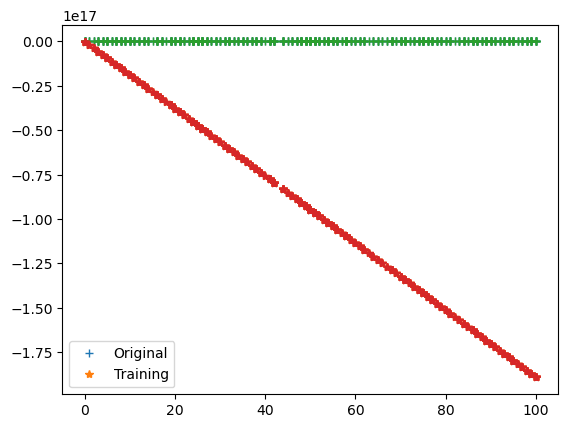

Iteration = 8, Loss = 6.197880943971296e+38


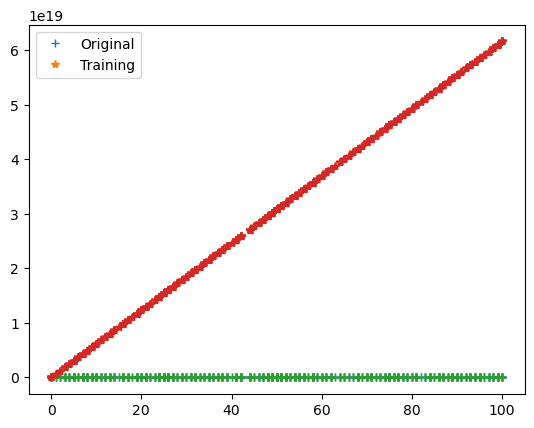

Iteration = 9, Loss = 6.563709655921176e+43


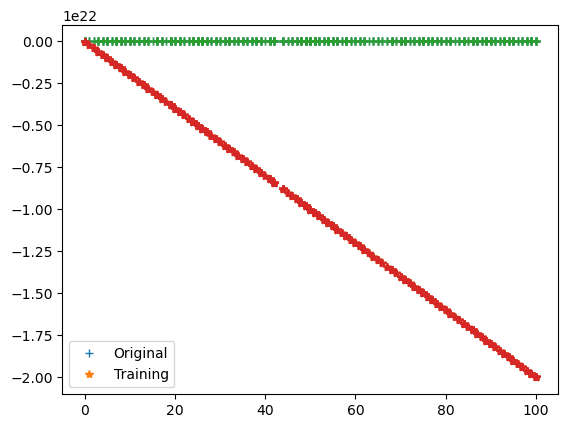

Iteration = 10, Loss = 6.951131336128552e+48


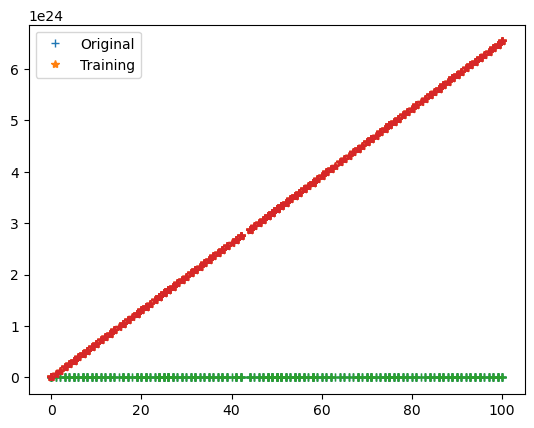

Iteration = 11, Loss = 7.3614205053265955e+53


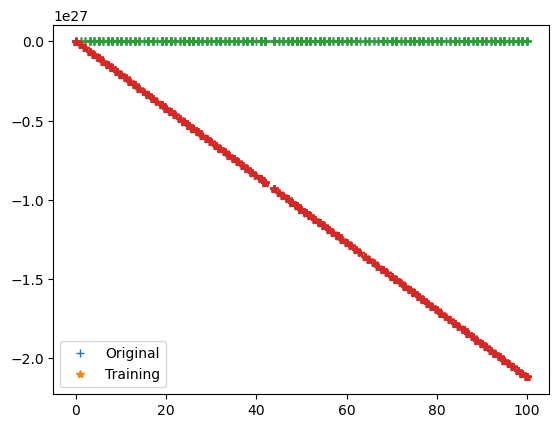

Iteration = 12, Loss = 7.795926912585766e+58


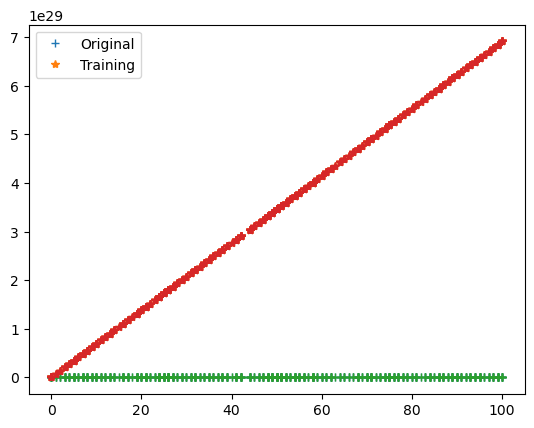

Iteration = 13, Loss = 8.256079975651747e+63


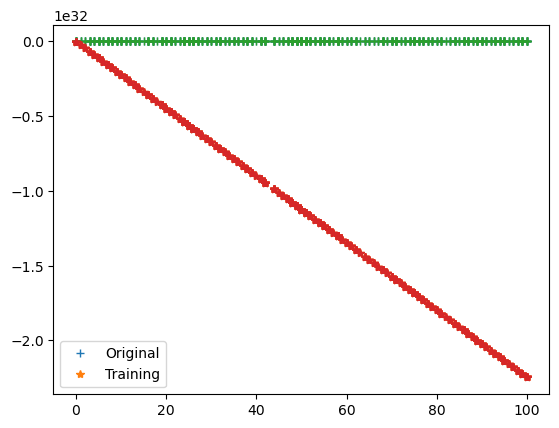

Iteration = 14, Loss = 8.743393483373405e+68


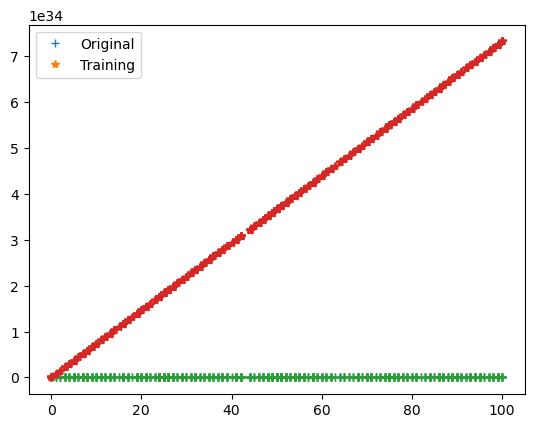

Iteration = 15, Loss = 9.259470575690695e+73


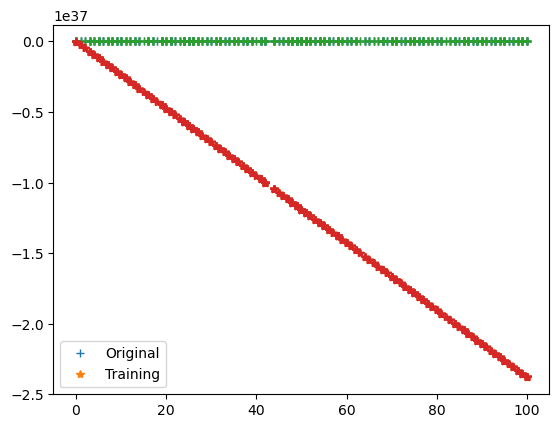

Iteration = 16, Loss = 9.80600901756536e+78


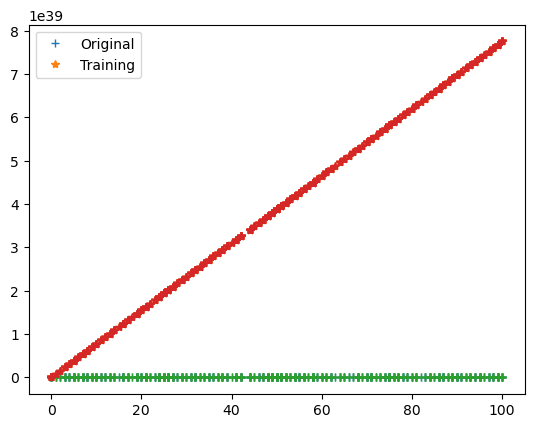

Iteration = 17, Loss = 1.0384806784204338e+84


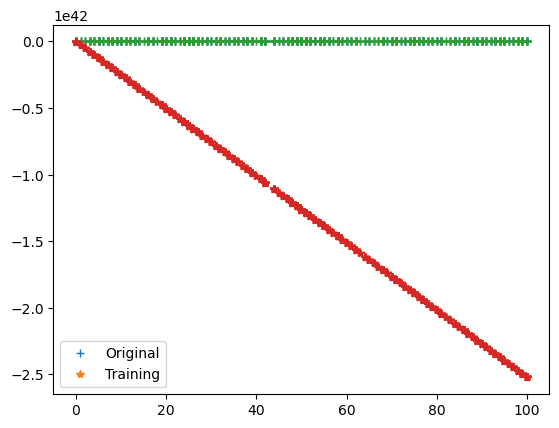

Iteration = 18, Loss = 1.0997767975949914e+89


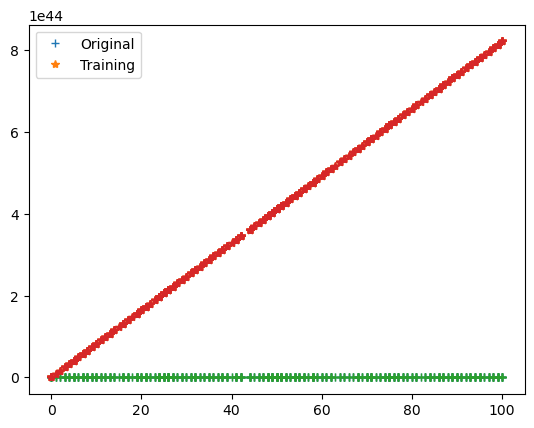

Iteration = 19, Loss = 1.164690908229512e+94


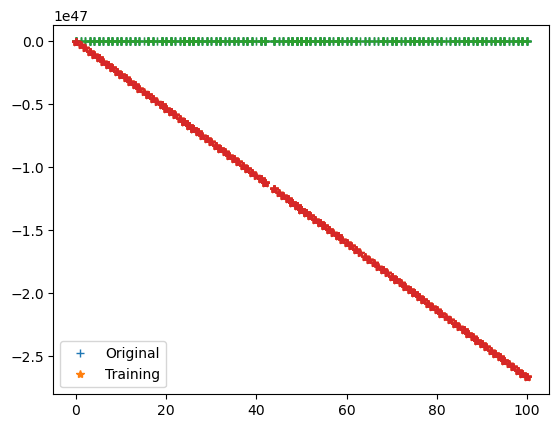

Iteration = 20, Loss = 1.2334365615631384e+99


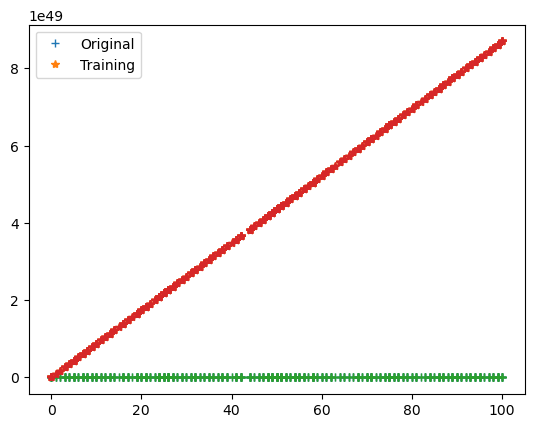

In [54]:
parameters, loss = train(train_input, train_output, 0.1, 20)

In [52]:
print(parameters)

{'m': 1.0089833240157462, 'c': -0.8111446966168494}


In [54]:
loss

[6264.063194315539,
 2844.171415366138,
 1292.562726096195,
 588.5961440012298,
 269.2057248149424,
 124.2979367127879,
 58.55311159771563,
 28.72461047410089,
 15.191385327868865,
 9.051344941952488,
 6.265600670845195,
 5.001704262441224,
 4.428271915064912,
 4.168103877021094,
 4.050064203163656,
 3.9965083256225817,
 3.9722088179529225,
 3.961182957757243,
 3.9561793661807103,
 3.953908084604955]

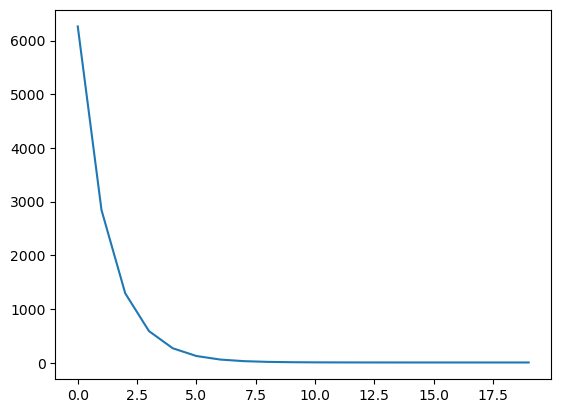

In [57]:
plt.plot(loss)

## Lets Predict

In [60]:
test_predictions = test_input * parameters['m'] + parameters['c']

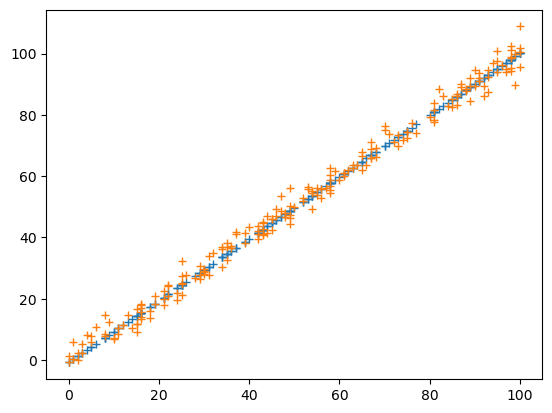

In [62]:
plt.plot(test_input ,test_predictions,'+')
plt.plot(test_input ,test_output , '+')
plt.show()

## Cost of prediction

In [69]:
cost_function(test_output , test_predictions)

4.133164929929558

In [ ]:
pred += 4.0562